# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, I explore a dataset from Kaggle, has 426K rows, to understand what factors affecting the price of a used car. Using different Machine Learning (ML) algorithms, I will say you (as dealer or private) what are the main drivers of the price of used cars. then you can pay attention to them as dealer or private to sell or buy.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

Using different factors, I will say which of them is important for price of used car, and how they affecting the price (positive or negative). 
Moreover, it is important to understand the strucrue of demand for used cars and in this project I will give you a clear suggestion to make decision about your portfolio of used cars.

If you are dealer or private and want to sell or buy used car, or if you are thinking which used car I can buy if I want to sell it again in the future it would be very easy for me. In this project I will give you a clear perspective to make decision. 

However different factors do not have the same effect on price, and I will give you an advice to focus only main drivers of the price of a used car. I know you are familiar with some of them such as age, mileage, and model. I will give you more information to have better understanding from demand and supply sides fo the market of used cars. 

After applying the Machine Learning (ML) models, we will check the validity of the model to be sure that our model is wokring well and results are reliable. we will use different methods to be sure that our model has minimum error and maximum verification in mathcing with data and also in prediction of the price of used car and its drivers.

### Data Understanding

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures
from sklearn.inspection import permutation_importance

In [146]:
import warnings
warnings.filterwarnings('ignore')

In [147]:
# Load the data
file_path= 'data/vehicles.csv'
df = pd.read_csv(file_path)

In [148]:
df.shape

(426880, 18)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [150]:
df.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
319943,7310457543,medford-ashland,8500,1990.0,gmc,vandura 3500,good,8 cylinders,gas,157724.0,clean,automatic,NaN,rwd,full-size,NaN,white,or
144683,7313349662,rockford,3950,2005.0,toyota,camry,good,4 cylinders,gas,187048.0,clean,automatic,NaN,fwd,full-size,sedan,silver,il
365968,7311656996,austin,12399,2014.0,honda,cr-v,NaN,4 cylinders,gas,117774.0,clean,automatic,2HKRM3H7XEH511692,NaN,NaN,SUV,NaN,tx
205076,7304549938,kalamazoo,950,2010.0,toyota,sienna,NaN,NaN,gas,42000.0,salvage,automatic,NaN,NaN,NaN,NaN,NaN,mi
341038,7314088518,york,28995,2020.0,honda,civic si sedan,excellent,4 cylinders,gas,14000.0,clean,manual,2HGFC1E52LH703547,fwd,compact,sedan,black,pa
354375,7315868364,knoxville,37990,2016.0,chevrolet,camaro ss coupe 2d,good,8 cylinders,gas,9704.0,clean,other,1G1FF1R79G0140582,rwd,NaN,coupe,red,tn
386193,7306941042,salt lake city,21990,2018.0,nissan,maxima,good,6 cylinders,gas,25500.0,clean,automatic,1N4AA6AP8JC395115,fwd,NaN,sedan,white,ut
102593,7313271066,ocala,700,2009.0,cadillac,cts,NaN,NaN,gas,86000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,fl
165589,7313995515,"kansas city, MO",18900,2018.0,kia,soul +,excellent,4 cylinders,gas,65875.0,clean,automatic,KNDJP3A5XJ7889748,fwd,NaN,hatchback,white,ks
290080,7313304532,cincinnati,5995,2002.0,ford,ranger,NaN,NaN,gas,33391.0,clean,automatic,1FTZR45E52TA23025,4wd,NaN,pickup,red,oh


In [151]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [152]:
# Find missing values
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [153]:
missing_values = df.isnull().mean() * 100
missing_values

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

good finding is that our target variable (price) does not have any missing value,
Moreover, other int variable is odometer and has only 1 percent missing value. 
feature of size has 71 percent data missing, condition and cylinders have more then 40 percent missing data. 
as we do not have any idea or theory about the missing value, we make decision to drop them. 

In [154]:
# Drop missing values
df.dropna(inplace=True)

df.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

now we do not have any missing data, then can go to the next steps. 
at first we look at to our target variable (pirce) 

In [155]:
df.describe()

,id,price,year,odometer
count,3.486800e+04,34868.000000,34868.000000,3.486800e+04
mean,7.311508e+09,15837.446771,2011.176867,1.073991e+05
std,4.299751e+06,13460.056823,7.162332,9.990878e+04
min,7.301592e+09,0.000000,1905.000000,0.000000e+00
25%,7.308189e+09,6500.000000,2008.000000,6.516400e+04
50%,7.312225e+09,12000.000000,2013.000000,1.040000e+05
75%,7.315136e+09,22003.500000,2016.000000,1.411678e+05
max,7.317099e+09,155000.000000,2022.000000,9.999999e+06


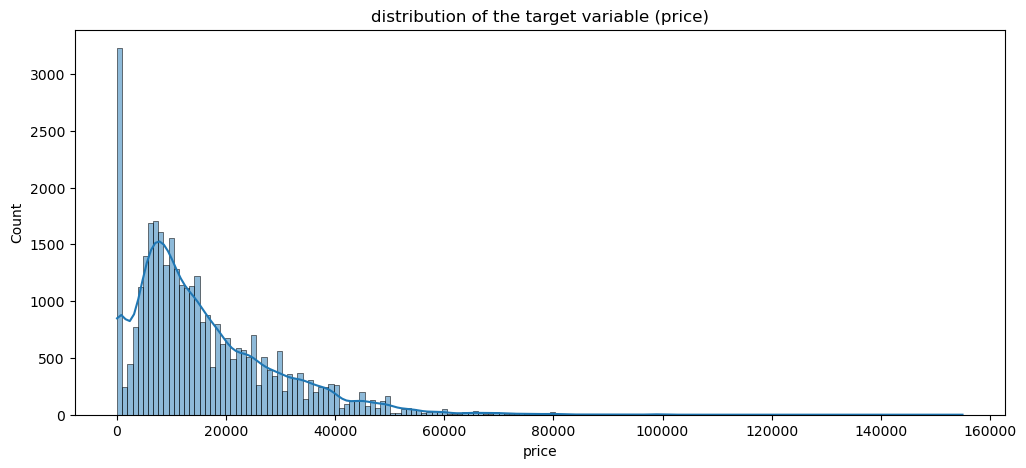

In [156]:
# distribution of the target variable with kde

plt.figure(figsize=(12,5))
sns.histplot(df['price'], kde=True)
plt.title('distribution of the target variable (price)')
plt.show()

distribution shows target variable has vaule 0, which should be removed 

In [157]:
df = df [df ['price'] > 0]

In [158]:
df.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
96322,7306097839,ft myers / SW florida,23500,2009.0,bmw,3 series,excellent,6 cylinders,gas,19888.0,clean,automatic,WBAWR33579P461559,rwd,sub-compact,convertible,blue,fl
381314,7313984464,san antonio,26986,2018.0,bmw,4 series,like new,4 cylinders,gas,76846.0,clean,automatic,WBA4W5C58JAA49396,rwd,mid-size,coupe,grey,tx
200527,7315247690,grand rapids,27955,2014.0,cadillac,escalade,excellent,8 cylinders,gas,105041.0,clean,automatic,1GYS4JEF1ER198732,4wd,full-size,SUV,black,mi
112919,7315086459,south florida,4000,2016.0,rover,superchar,like new,6 cylinders,gas,76318.0,clean,automatic,SALGS2PF8GA319626,4wd,full-size,SUV,black,fl
287464,7309280731,akron / canton,12990,2012.0,ram,1500,excellent,8 cylinders,gas,156867.0,clean,automatic,3C6JD7EP3CG169282,4wd,full-size,truck,white,oh
220546,7315245007,joplin,8997,2004.0,mercedes-benz,clk-class,good,6 cylinders,gas,106047.0,clean,automatic,WDBTK65G94T025787,rwd,mid-size,convertible,black,mo
151928,7312920248,indianapolis,6999,2007.0,mercedes-benz,e-class,excellent,6 cylinders,gas,110698.0,clean,automatic,WDBUF87X97X217371,4wd,full-size,sedan,blue,in
114319,7313375391,space coast,1,2019.0,lincoln,continental,excellent,10 cylinders,gas,62484.0,clean,other,1LN6L9HK3K5600623,4wd,compact,sedan,black,fl
192420,7312796420,worcester / central MA,5600,2014.0,chevrolet,spark,like new,4 cylinders,gas,105756.0,clean,automatic,KE8CD6S90DC514055,fwd,sub-compact,SUV,black,ma
168568,7303913865,topeka,19990,2011.0,chevrolet,silverado 1500,good,8 cylinders,gas,151646.0,clean,automatic,3GCPKSE31BG373957,4wd,full-size,truck,red,ks


In [159]:
#describe int variabels, 
df.describe().round(1)

,id,price,year,odometer
count,3.249600e+04,32496.0,32496.0,32496.0
mean,7.311551e+09,16993.5,2010.9,108983.2
std,4.294195e+06,13219.4,7.3,102271.0
min,7.301592e+09,1.0,1905.0,0.0
25%,7.308238e+09,7500.0,2008.0,67449.8
50%,7.312411e+09,13125.5,2012.0,105584.0
75%,7.315154e+09,23395.0,2015.0,142845.5
max,7.317099e+09,155000.0,2022.0,9999999.0


In [160]:
# we see unique values for each features 
df.nunique()

id              32496
region            390
price            3135
year               89
manufacturer       41
model            4947
condition           6
cylinders           8
fuel                5
odometer        15671
title_status        6
transmission        3
VIN             20715
drive               3
size                4
type               13
paint_color        12
state              51
dtype: int64

In [161]:
# we define categorical and numerical features. 
cat_feature = df.select_dtypes(include=['object', 'category']).columns
num_featuer = df.select_dtypes(include = ['int64','float64']).columns 
print ("\ categorical data are:", cat_feature)
print ("\ numerical data are:", num_featuer)

\ categorical data are: Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object')
\ numerical data are: Index(['id', 'price', 'year', 'odometer'], dtype='object')


Data Summary

At first load the data, then using some codes in python we found that After loading the dataset, we found that:

1- Dataset has 426880 rows and 18 features. 
 1-1- It has four unmber features (incluing 'id', 'price', 'year', and 'odometer')
 1-2- It has 14 object features
 1-3- we can at first looking, categorize features to some general subjects, such as 
     1-3-1-idenficiation (including id and VIN number),
     1-3-2-characcters of car (such as brand, model, year, cylinders, size, type, fuel, transmission and so on),
     1-3-3-transaction ( price and title_status),

2- Dataset covers more than 120 years, from 1900 to 2022. 

3- Our target feature is price, and foretunatley it has not any missing data. However it fluctuates from $0 to 3.736929e+09( more than 3 million dollars) which shows it has some outliers or error in data entry. 

4- Data has missing values, we should make decision about them. we drop the missing values, as we do not have any theory or especial featerues to be conservatie about them. If some features were more important, then we should be conservative to remove them. 

5- As value 0 for price does not make any sense, then we drop it. 
6- Description of the price shows that the average of price is around 17000 dollars. Most of dataset for price fluctaes from 1000 dollars to 50000 dollars. 

7- The Statistical description shows that after droping price with value 0, the minimum value of price is \$1, and maximum is \$155000, which shows some of the values of price can be outlier and we can use some methods, such as z_score to drop them in the next part.  

8- These findings sowh that we shoud prepare the data. After that we should define our models, which are some regressions, and using mentioend features (except price) we would understand the dirvers of price and would used them to predict the price of used cars. 

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [162]:
# To be sure about the data, we check again missing data, also duplicated data too 
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [163]:
# Then we choose resonable price from 1000 to 150,000 dollars. 
df = df[(df['price'] >= 1000) & (df['price'] <= 150000)]


In [164]:
df['price'].max()

150000

In [165]:
df['price'].min()

1000

In [166]:
#describe int variabels, 
df.describe().round(1)

,id,price,year,odometer
count,3.162900e+04,31629.0,31629.0,31629.0
mean,7.311560e+09,17451.9,2010.9,109721.7
std,4.295557e+06,13073.2,7.3,86824.9
min,7.301592e+09,1000.0,1905.0,0.0
25%,7.308240e+09,7991.0,2008.0,69393.0
50%,7.312405e+09,13900.0,2012.0,106978.0
75%,7.315181e+09,23900.0,2015.0,143584.0
max,7.317099e+09,150000.0,2022.0,9999999.0


#### Visulization of pirce 

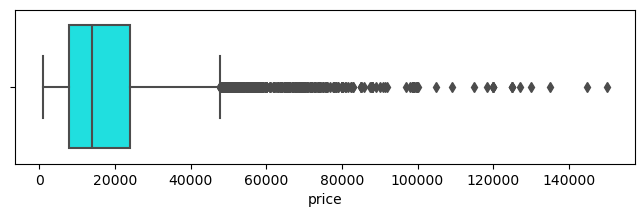

In [167]:
#box plot for price 
plt.figure(figsize=(8,2))
sns.boxplot(data=df, x='price',  color='cyan')
plt.show()

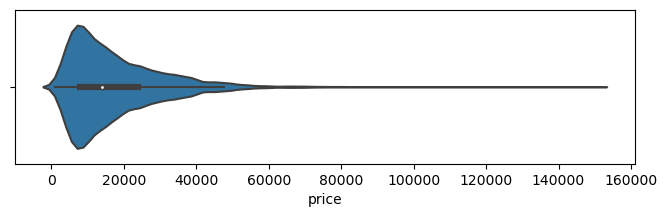

In [168]:
#violinplot for price
plt.figure(figsize=(8,2))
sns.violinplot(data=df, x='price')
plt.show()

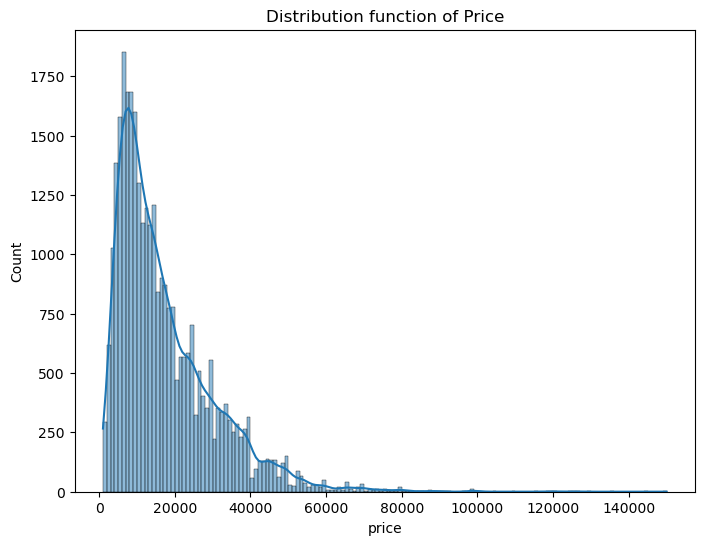

In [169]:
# histplot for price 
plt.figure(figsize=(8,6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution function of Price')
plt.show()


#### <span style="color: red;"> Important finding: most of demand for used cars have price between 5000 to 25000 dollars  </span>

#price can be divided into three categories, 
1-low price cars : from 1000 to 10000
2-middle pirce cars: from 10000 to 50000
3-high price cars: more than 50000

In [170]:
low_price = df.query ('price > 1000 and price <= 10000')
middle_price = df.query ('price > 10000 and price <= 50000')
high_price = df.query ('price > 50000')

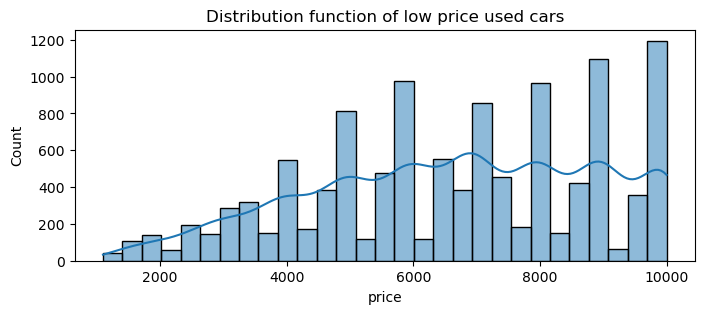

In [171]:
plt.figure (figsize = (8,3))
sns.histplot (low_price['price'], kde= True)
plt.title('Distribution function of low price used cars')
plt.show()

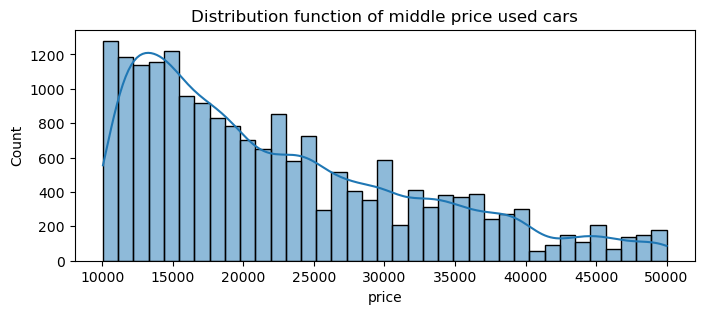

In [172]:
plt.figure (figsize = (8,3))
sns.histplot (middle_price['price'], kde= True)
plt.title('Distribution function of middle price used cars')
plt.show()

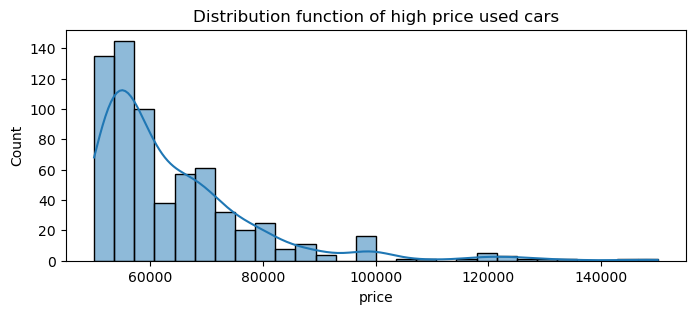

In [173]:
plt.figure (figsize = (8,3))
sns.histplot (high_price['price'], kde= True)
plt.title('Distribution function of high price used cars')
plt.show()

#### Visualization based on year 

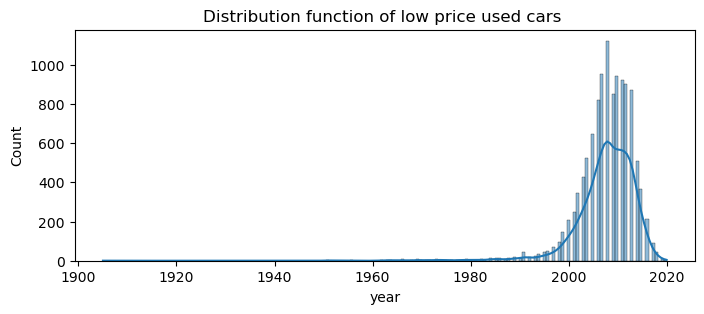

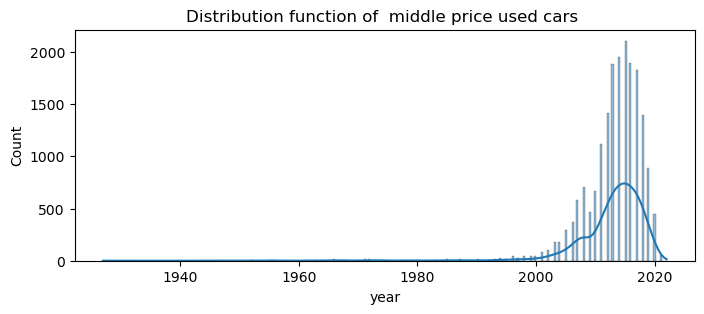

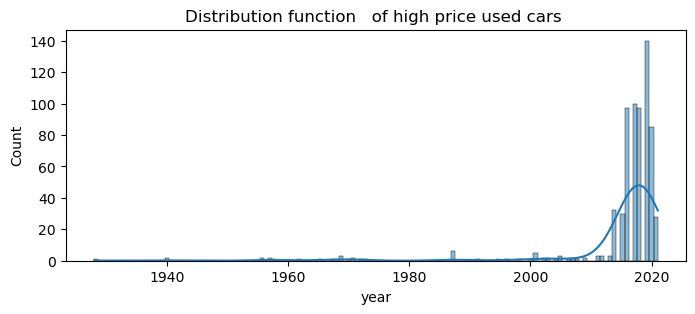

In [174]:
# we can also see distribution of price, based on the year 
plt.figure (figsize = (8,3))
sns.histplot (low_price['year'], kde= True)
plt.title('Distribution function of low price used cars ')
plt.show()
plt.figure (figsize = (8,3))
sns.histplot (middle_price['year'], kde= True);
plt.title('Distribution function of  middle price used cars ')
plt.show()
plt.figure (figsize = (8,3))
sns.histplot (high_price['year'], kde= True);
plt.title('Distribution function   of high price used cars ')
plt.show()

In [175]:
# general visualization of year variable is also as following 

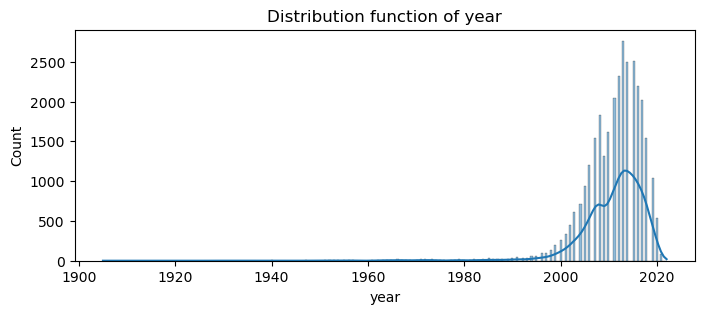

In [176]:
plt.figure (figsize = (8,3))
sns.histplot (df['year'], kde= True)
plt.title('Distribution function of year')
plt.show()

#### <span style="color: red;"> Important finding: most of demand for used cars with year >= 2008  </span>

In [177]:
# visulization for odometer 

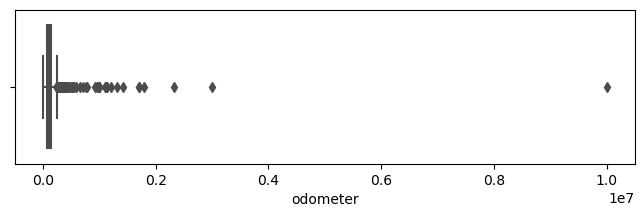

In [178]:
#box plot for odometer  
plt.figure(figsize=(8,2))
sns.boxplot(data=df, x='odometer',  color='cyan')
plt.show()

In [179]:
# we see that some odometer are oulier. we can remover them with z-score or other approach, but we can make decision for simplicity odometer <=400_000
df= df [( df ['odometer'] <= 400000)]

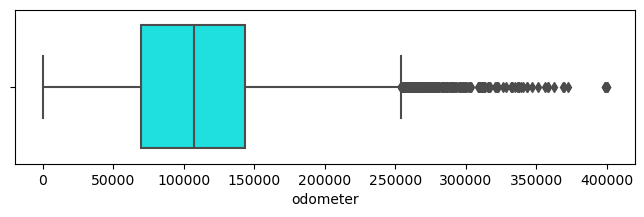

In [180]:
#box plot for odometer  
plt.figure(figsize=(8,2))
sns.boxplot(data=df, x='odometer',  color='cyan')
plt.show()

#### <span style="color: red;"> Important finding: odometers between 50_000 to 150_000 have the highest demand and odometer higher than 250_000 is very low </span>

In [181]:
# with visualization of price and year, we see most of the cars are from 2000, and as the years comes closer, the price goes up.
# which represents that it would be a negative correlation between age and price. 

In [182]:
# now we can also visualize the data through all features with price, start from year and odometer 

### EDA: Visualizing relationships between features and price

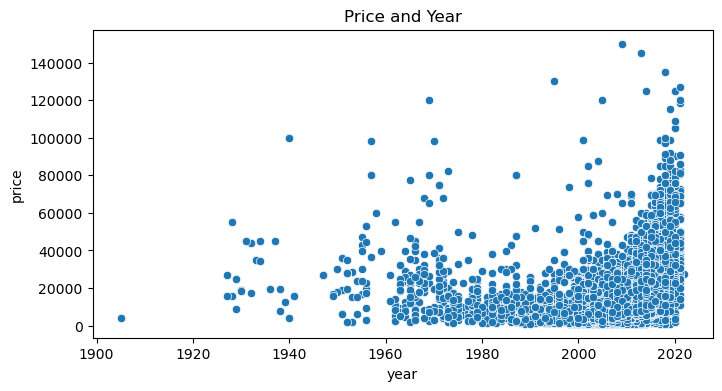

In [183]:
# price and year 
plt.figure(figsize=(8,4))
sns.scatterplot(data= df , x='year', y='price')
plt.title('Price and Year')
plt.show()

In [184]:
# figure shows negative relationship between pirce and age 

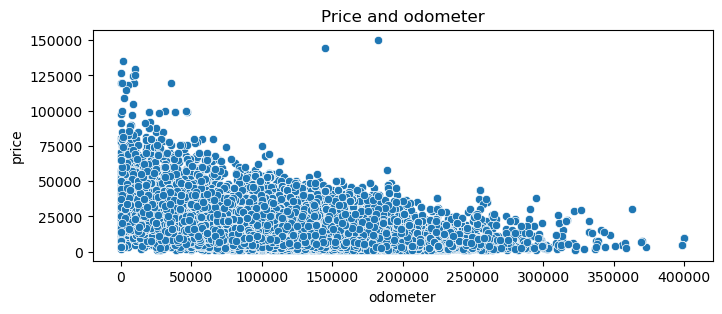

In [185]:
# price and odometer 
plt.figure(figsize=(8,3))
sns.scatterplot(data= df , x='odometer', y='price')
plt.title('Price and odometer')
plt.show()


In [186]:
# plot shows negative correlation between price and odometer 

In [187]:
# check the correlation between price,year and odometer
corr_num = df[['price', 'year', 'odometer']] .corr()
print(corr_num)


             price      year  odometer
price     1.000000  0.343463 -0.445633
year      0.343463  1.000000 -0.285684
odometer -0.445633 -0.285684  1.000000


In [101]:
# There is positive correlation between year and price, then age has negative effect on pirce,
# There is negatve correlation between odometer and price

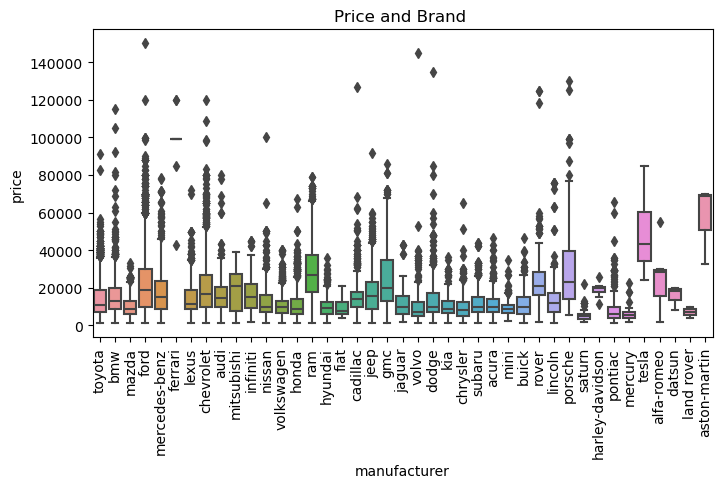

In [102]:
# Price and brand 
plt.figure(figsize=(8,4))
sns.boxplot(data= df , x='manufacturer', y='price')
plt.xticks(rotation= 90)
plt.title('Price and Brand ')
plt.show()


In [103]:
# figure shows some brand such as aston-martin, porsche, and tesla are highe price,
# while fiat, hyundai, volkswagen, mazda, saturn and land rover are low price 

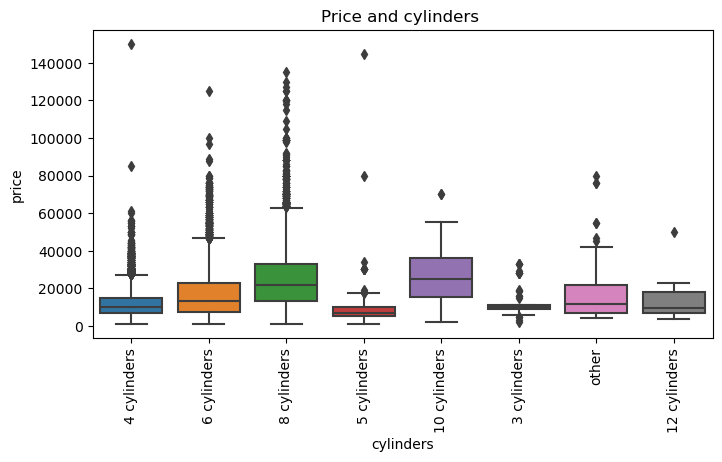

In [104]:
# Price and cylinders 
plt.figure(figsize=(8,4))
sns.boxplot(data= df , x='cylinders', y='price')
plt.xticks(rotation= 90)
plt.title('Price and cylinders ')
plt.show()

In [105]:
# plot shows that 3, 12 and 5 cylinders have low price, while 10, 8 and 6 cylinders have high price 

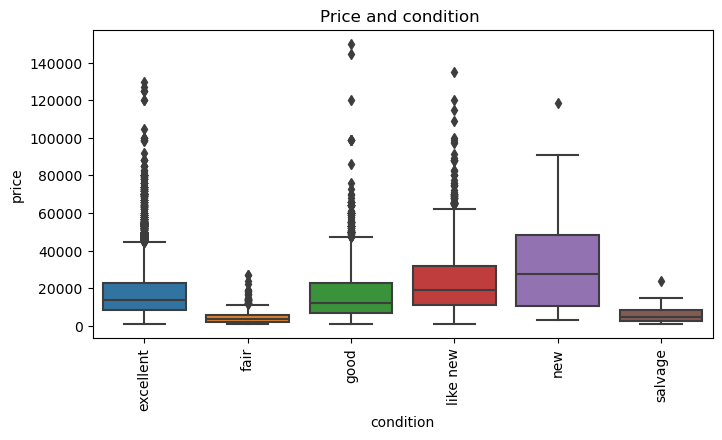

In [106]:
# Price and condition 
plt.figure(figsize=(8,4))
sns.boxplot(data= df , x='condition', y='price')
plt.xticks(rotation= 90)
plt.title('Price and condition ')
plt.show()

In [107]:
# figure represents that ranking of pirce is  new, like new, excellent, good, fair and salvage respectively. 

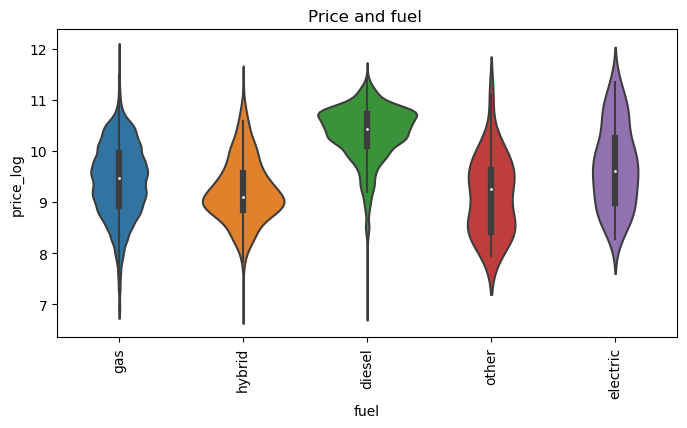

In [108]:
# Price and fuel 
df['price_log'] = np.log(df['price'])
plt.figure(figsize=(8,4))
sns.violinplot (data= df , x='fuel', y='price_log')
#sns.boxplot(data= df , x='fuel', y='price_log')
plt.xticks(rotation= 90)
plt.title('Price and fuel ')
plt.show()

In [109]:
# figure shows that in average, diesel has hig price, while bybrid has low price. 

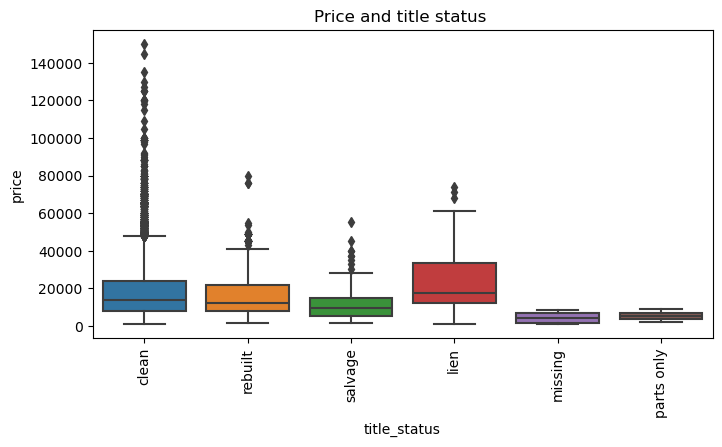

In [110]:
# Price and title status 
plt.figure(figsize=(8,4))
sns.boxplot(data= df , x='title_status', y='price')
plt.xticks(rotation= 90)
plt.title('Price and title status ')
plt.show()

In [111]:
# plot shows that lien and clean title have higher price. 

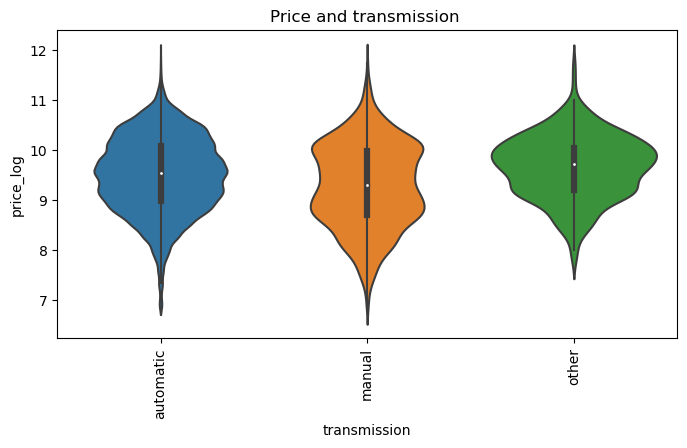

In [112]:
# Price and transmission 
plt.figure(figsize=(8,4))

sns.violinplot(data= df , x='transmission', y='price_log')
plt.xticks(rotation= 90)
plt.title('Price and transmission ')
plt.show()

In [113]:
# figure shows that average price of manual is minimum, and automatic has higher price. 

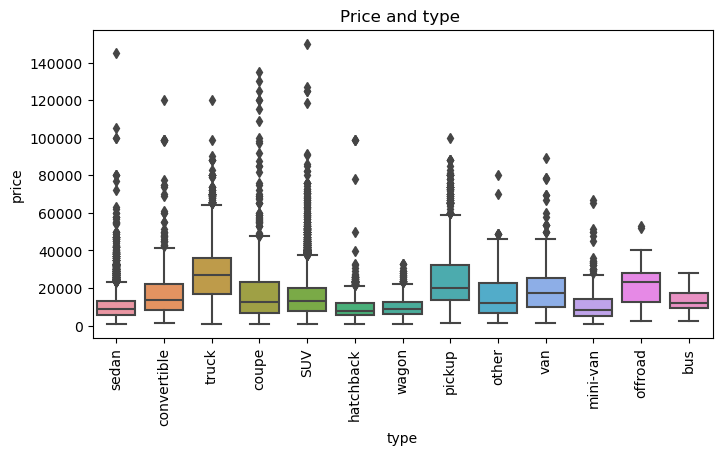

In [114]:
# Price and type 
plt.figure(figsize=(8,4))
sns.boxplot(data= df , x='type', y='price')
plt.xticks(rotation= 90)
plt.title('Price and type ')
plt.show()


In [115]:
# figure shows that sedan, hathcback, wagon and min-van have low price, while truck, offroad, and pickup have high price 

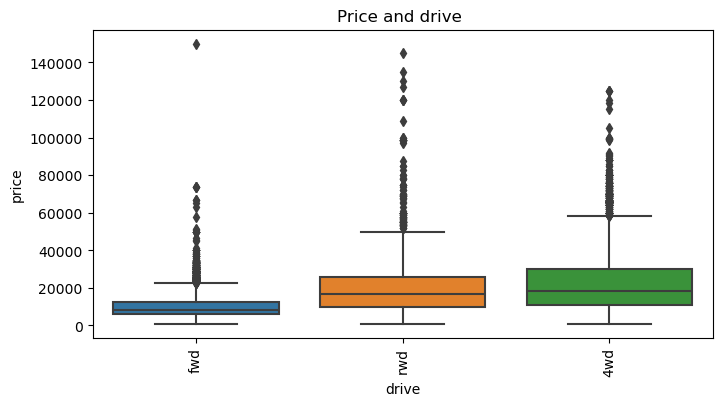

In [116]:
# Price and drive  
plt.figure(figsize=(8,4))
sns.boxplot(data= df , x='drive', y='price')
plt.xticks(rotation= 90)
plt.title('Price and drive ')
plt.show()

In [117]:
# plot shows that 4wd has higher pirce and fwd has lower price, but there is not important difference 

In [118]:
# after data preparation and EDA, now we start modeling 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [119]:
df.nunique()

id              31582
region            390
price            3076
year               89
manufacturer       41
model            4908
condition           6
cylinders           8
fuel                5
odometer        15421
title_status        6
transmission        3
VIN             20405
drive               3
size                4
type               13
paint_color        12
state              51
price_log        3076
dtype: int64

In [120]:
# at first we think abouth main features we saw in data preparation and also data understanding
# we should think which features are important. 
# we categorize them in to numerical and categorical,
# id, VIN, and some othe featurs do not have signigifcat impact of the model, and only make the model complicated and increase the fitting problem. 
# More over some categorical columns have enormous unique, for example we have 4917 model, 390 region and so on, \
# using the dummy variable for them make just the model complicated without reasobale meaning. then we eliminate features to have good understanding 
# with this expalnation we think:
#1-cumercial variables affect pirce are : year and odometer, 
#2- categoraical variables are affecting the price and also create normal unique value are : 
# 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type', 'paint_color', 'manufacturer']

In [121]:
# Imputation for remaining columns
cat_cols = ['condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type', 'paint_color', 'manufacturer','title_status']
num_cols = ['price', 'year', 'odometer']
df=df[cat_cols + num_cols ]


In [122]:
# we define age variable, instead of year and drop year variable 
df['age'] = 2024 - df['year']
df.drop(columns = ['year'], inplace = True)

#### Preparing the Test and Train Samples

In [123]:
#target is price 
X = df.drop(columns=['price'])
y = df['price']

# OneHot Encode the features and drop the first value to reduce multicollinearity
X = pd.get_dummies(X, dtype=float, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

####  Function of errors: Reporting of the results, based on errors and R2 

In [124]:
# before starting the models, we define a funtion to get R2 and MSE for regression 
def error_metrics(y_train, y_train_pred, y_test, y_test_pred, pipeline):
    
    errors = {}
    
    # Errors for train data
    errors["Train_MAE"] = round (mean_absolute_error(y_train, y_train_pred),2)
    errors["Train_MSE"] = round (mean_squared_error(y_train, y_train_pred), 2)
    errors["Train_RMSE"] = round (np.sqrt(errors["Train_MSE"]), 2)
    errors['Train_Score']= round (pipeline.score(X_train, y_train), 2)
    
    # Errors for test data
    errors["Test_MAE"] = round (mean_absolute_error(y_test, y_test_pred), 2)
    errors["Test_MSE"] = round (mean_squared_error(y_test, y_test_pred), 2)
    errors["Test_RMSE"] = round (np.sqrt(errors["Test_MSE"]), 2)
    errors['Test_Score']= round (pipeline.score(X_test, y_test), 2)
    
    return errors

model_evaluation = []



#### 1-Linear Regression 

In [125]:
# define pipe.
#at first we define standard scalter then use linear regression

pipe_linear = Pipeline([('scaler', StandardScaler()), 
                  ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
                 ('linearRegression', LinearRegression())
                       ])

pipe_linear.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('linearRegression', LinearRegression())])

In [126]:
y_train_pred = pipe_linear.predict(X_train)
y_test_pred = pipe_linear.predict(X_test)

er_linear = error_metrics(y_train, y_train_pred, y_test, y_test_pred,pipe_linear)
print ('MAE, MSE, RMSE, and Score : ')
er_linear

MAE, MSE, RMSE, and Score : 


{'Train_MAE': 3084.29,
 'Train_MSE': 24750158.4,
 'Train_RMSE': 4974.95,
 'Train_Score': 0.86,
 'Test_MAE': 287085465508.01,
 'Test_MSE': 2.7892899123595808e+26,
 'Test_RMSE': 16701167361473.81,
 'Test_Score': -1.6333114693877402e+18}

2- Ridge Regression

In [127]:
pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree = 2, include_bias = False)),
    ('ridge', Ridge()),
])
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge())])

In [128]:
y_train_pred = pipe_ridge.predict(X_train)
y_test_pred = pipe_ridge.predict(X_test)

er_ridge = error_metrics(y_train, y_train_pred, y_test, y_test_pred,pipe_ridge)
print ('MAE, MSE, RMSE, and Score : ')
er_ridge

MAE, MSE, RMSE, and Score : 


{'Train_MAE': 3084.68,
 'Train_MSE': 24750509.98,
 'Train_RMSE': 4974.99,
 'Train_Score': 0.86,
 'Test_MAE': 3479.23,
 'Test_MSE': 39190833.5,
 'Test_RMSE': 6260.26,
 'Test_Score': 0.77}

#### 3- Lasso Regression  

In [129]:
lasso_param_dict = {'lasso__alpha':[0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}

pipe_lasso = Pipeline([('scaler', StandardScaler()), 
                       ('lasso', Lasso())])
lasso_grid = GridSearchCV(pipe_lasso, param_grid=lasso_param_dict,scoring = 'neg_mean_squared_error', cv = 5)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.001, 0.1, 1.0, 10.0, 100.0,
                                          1000.0]},
             scoring='neg_mean_squared_error')

In [130]:
y_train_pred = lasso_grid.predict(X_train)
y_test_pred = lasso_grid.predict(X_test)

er_lasso = error_metrics(y_train, y_train_pred, y_test, y_test_pred,pipe_ridge)
print ('MAE, MSE, RMSE, and Score : ')
er_lasso

MAE, MSE, RMSE, and Score : 


{'Train_MAE': 4845.48,
 'Train_MSE': 54162523.02,
 'Train_RMSE': 7359.52,
 'Train_Score': 0.86,
 'Test_MAE': 4933.88,
 'Test_MSE': 54481957.83,
 'Test_RMSE': 7381.19,
 'Test_Score': 0.77}

#### 4-  SFS (Seaquential Feature Selection)

In [131]:
pipe_sfs_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('sfs', SequentialFeatureSelector(estimator = Lasso(), n_features_to_select =10)),
    ('lin_regression', LinearRegression()),
])
pipe_sfs_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sfs',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=10)),
                ('lin_regression', LinearRegression())])

In [132]:
y_train_pred = pipe_sfs_lasso.predict(X_train)
y_test_pred = pipe_sfs_lasso.predict(X_test)

er_sfs = error_metrics(y_train, y_train_pred, y_test, y_test_pred,pipe_sfs_lasso)
print ('MAE, MSE, RMSE, and Score : ')
er_sfs

MAE, MSE, RMSE, and Score : 


{'Train_MAE': 5258.85,
 'Train_MSE': 62086033.58,
 'Train_RMSE': 7879.47,
 'Train_Score': 0.64,
 'Test_MAE': 5295.17,
 'Test_MSE': 61956610.51,
 'Test_RMSE': 7871.25,
 'Test_Score': 0.64}

In [133]:
feature_names = pipe_sfs_lasso[:-1].get_feature_names_out()
coefficients = pipe_sfs_lasso.named_steps['lin_regression'].coef_
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df

,Feature,Coefficient
0,odometer,-5649.551575
1,age,-3289.605030
2,cylinders_4 cylinders,-1893.185235
3,cylinders_8 cylinders,1588.820493
4,fuel_gas,-3932.095580
5,fuel_hybrid,-1182.692909
6,drive_fwd,-2257.168126
7,type_pickup,1038.788147
8,type_truck,2022.791538
9,manufacturer_ferrari,1131.946577


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [134]:
list= {'Linear Regression': er_linear, 'Ridge Regression': er_ridge,
       'Lasso Regression': er_lasso, 'Seaquential Feature Selection': er_sfs,
        }
list= pd.DataFrame (list)
list.T

,Train_MAE,Train_MSE,Train_RMSE,Train_Score,Test_MAE,Test_MSE,Test_RMSE,Test_Score
Linear Regression,3084.29,24750158.40,4974.95,0.86,2.870855e+11,2.789290e+26,1.670117e+13,-1.633311e+18
Ridge Regression,3084.68,24750509.98,4974.99,0.86,3.479230e+03,3.919083e+07,6.260260e+03,7.700000e-01
Lasso Regression,4845.48,54162523.02,7359.52,0.86,4.933880e+03,5.448196e+07,7.381190e+03,7.700000e-01
Seaquential Feature Selection,5258.85,62086033.58,7879.47,0.64,5.295170e+03,6.195661e+07,7.871250e+03,6.400000e-01


#### <span style="color: red;"> Ridge Regression is the best Regression: </span>

#####  1- Seaquential Feature Selection has the mimimum R2 for Training, and its RMSE, MSE and MAE are maximum, then it can not be our cadidate
#####  2-Ridge regression and Lasso Regression have similar R2 as Linear regression in Training dataset, but their R2 for Test data set (0.77) makes sense then we set aside Linear Regression
#####  3- between Ridge and Lasso regressions, Ridge regression has better performance in both Training and Test data sets, as it's MAE, MSE, and RMSE are lower than the Lasso Regression, then the best model is Ridge model. 
##### 4- Ridge regression can explain 86% of trainign dataset and %77 of test dataset. generally, we can say our model explain 80% of the main drivers of price of used cars 


#### <span style="color: red;"> Importnat Statistic Issue: Best model can explain  around 80% of drivers of price of used car.  </span>

In [137]:
# coefficient of best model 
feature_names = pipe_ridge[:-1].get_feature_names_out()
coefficients = pipe_ridge.named_steps['ridge'].coef_
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df

,Feature,Coefficient
0,odometer,-3973.301925
1,age,-7257.734756
2,condition_fair,-4.593717
3,condition_good,-215.398441
4,condition_like new,9.776698
...,...,...
4180,title_status_parts only title_status_rebuilt,0.123915
4181,title_status_parts only title_status_salvage,0.018203
4182,title_status_rebuilt^2,-83.024603
4183,title_status_rebuilt title_status_salvage,1.481792


In [138]:
# we can check the most important factors affecting the price. 
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)
coef_df.head(50)

,Feature,Coefficient
1,age,-7257.734756
0,odometer,-3973.301925
1402,fuel_gas manufacturer_toyota,-3015.960442
1377,fuel_gas manufacturer_ford,-2429.528559
1371,fuel_gas manufacturer_chevrolet,-1950.631735
892,cylinders_4 cylinders paint_color_green,-1425.287926
1051,cylinders_6 cylinders paint_color_green,-1402.593827
906,cylinders_4 cylinders manufacturer_chevrolet,-1395.171663
1129,cylinders_8 cylinders paint_color_green,-1381.741744
1065,cylinders_6 cylinders manufacturer_chevrolet,-1357.434905


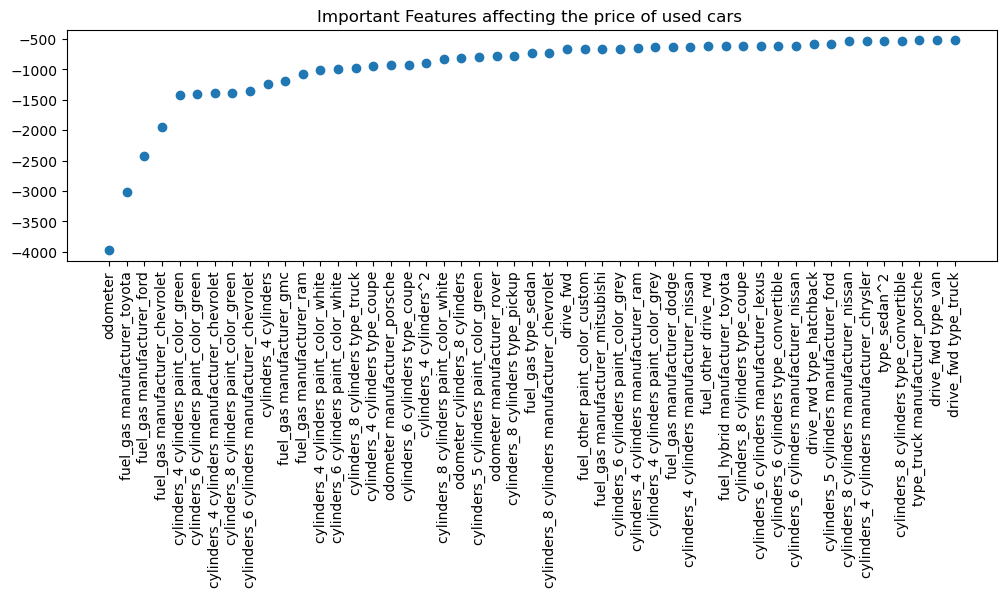

In [139]:
data=coef_df.iloc [ 1: 50]
plt.figure(figsize= (12,3))
plt.scatter(data['Feature'], data['Coefficient'] )
plt.xticks(rotation= 90)
plt.title('Important Features affecting the price of used cars ')
plt.show()

#### <span style="color: red;"> Top 50 factors affecting negatively the price, represents that  </span>
#####  1- Age and Odometer are very important. as age and odometer go up, the price of used cars goes down. Then it is better to
#####          have used cars with   lower odometer and age to sell them easily. 
#####  2- Feul: fuel gas has negative effect on price, and cars with fuel gas are hard to sell. 
#####  3- Manufacturer: buick, cheverolet, gmc  and ram have negative effect on price. it is better to get aside from buick and cheverolet.  
#####  4- Transmission: manual transmission has negative effect on price. It is hard to sell manual cars 
#####  5- combination of 3 and 4, represents that buick manufacturer and manual transmission would be very bad condition to car dealer 
#####  6- Color: red and green cars are hard to sell and have negative effect on price, 
#####  7- Type:  "van" type can not be sold easily. 
#####  8- Condition: if odometer is high, it is better to sell   like new condition ("condition_like new) or good condition 
#####  8- Drive: drive_fwd is hard to sell, as it has negative effect on price

In [140]:
# We can also check from the down to understand interaction effect of variables. 
coef_df.tail(50)

,Feature,Coefficient
111,odometer drive_rwd,554.083467
867,cylinders_4 cylinders cylinders_8 cylinders,559.841872
452,condition_like new cylinders_8 cylinders,563.756944
1363,fuel_gas paint_color_white,563.799818
2503,type_van manufacturer_hyundai,564.009234
2496,type_van manufacturer_dodge,582.164620
230,age manufacturer_chevrolet,582.371005
913,cylinders_4 cylinders manufacturer_gmc,594.528213
889,cylinders_4 cylinders paint_color_blue,604.931916
107,odometer fuel_other,612.858637


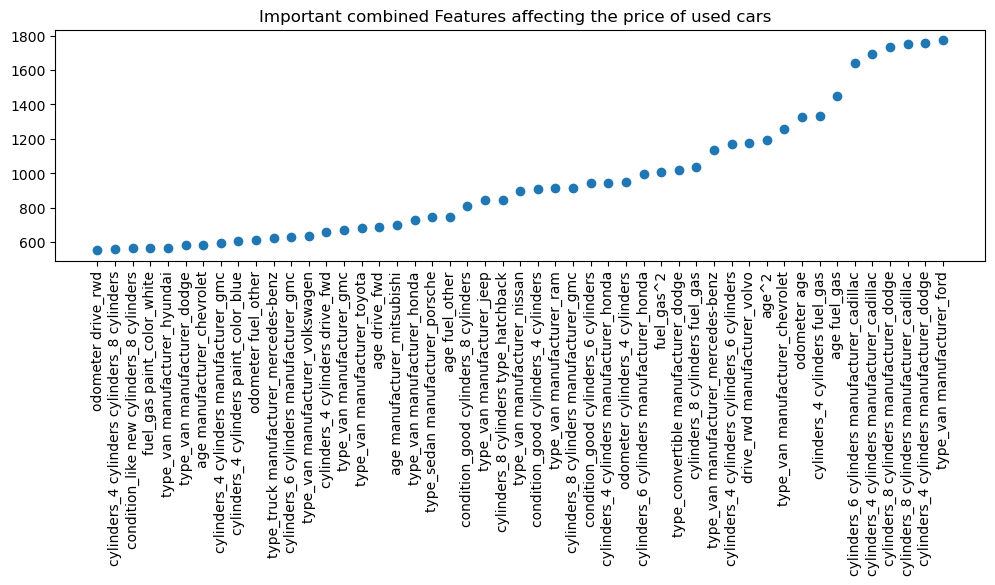

In [141]:
data=coef_df.iloc [ -50: -1]
plt.figure(figsize= (12,3))
plt.scatter(data['Feature'], data['Coefficient'] )
plt.xticks(rotation= 90)
plt.title('Important combined Features affecting the price of used cars  ')
plt.show()

#### <span style="color: red;"> From 50 combined factors affecting positively the price:  </span>
##### 1- Age: if car's age is high, 
#####         1-1-: then it is better to sell cars from these companies: Toyota, Honda, Nissa, and Ford. 
#####         1-2-: it is better to sell cars with 4, 6, or 8 cylinders. 
##### 2- Odometer: if odometer is high, then it is better to sell cars that: 
#####         2-1-: cars have good conditin or 
#####         2-2: are from Tesla company or
#####         2-3-: kind of drive is rwd. 
##### 3- Condition: good condition has the highest level to sell. 
##### 4- Cylinders: 4,6,8 cylinders are good cars to sell

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

#### <span style="color: red;"> My Idea for used car dealeres has three parts: </span>
##### First Part: List of factors affecting the price of used cars 
##### Second Part: How factor affecting used car price
##### Third Part: 11 clear suggestions (for buying and seeling used cars)

#### <span style="color: red;"> First Part: List of factors affecting the price of used cars : </span>
#####      Age, Odometer, 
##### Manufacturer, Transmissin, Condition, 
#####       Cylinders, Fuel, Color and  Drive

#### <span style="color: red;"> Second Part: How factor affecting used car price </span>

##### 1- Age: as age goes up, the price of used car goes down. age is an important factor as correlation between price and age is -30%
##### 2- Odometer: as Odometer goes up, the price of used car goes down too. Odometer is also an important factor and its correlation with price is also  aorund -30%
#####  3- Manufacturer: 
#####    3-1- Best companeis (used car for sale): Toyota, Honda, Tesla, and Ford 
#####    3-2- Worst companies (used carfor slae): Buick and Cheverolet.
#####  4- Transmissin: manual transmission has negative effect on pirce, then it would be hard to be sold. 
#####  5- Condition:  used cars with: good condition or like new condition have the highest level to be sold.
#####   6- Cylinders: 4, 6, and 8  Cylinders cars have better chance to be sold.
#####  7- Feul: fuel gas has negative effect on price, and cars with fuel gas are hard to sell.
##### 8- Color: red and green cars are hard to sell and have negative effect on price.
##### 9- Drive: drive_fwd is hard to sell, while drive_rwd has good condition for sell. 

#### <span style="color: red;"> Third Part: 11 clear suggestions (for buying and seeling used cars) </span>

##### 1-  <span style="color: red;">  Price: </span> focus on cars their prices is between <span style="color: green;">  5000 to 25000 dollars</span> , they have high demand.  
##### 2-  <span style="color: red;">  Year (age): </span>Focus on cars with <span style="color: green;">  age <= 15  years</span> , they have high demand.
##### 3- <span style="color: red;">  Odometer:</span>  cars have  <span style="color: green;">    500,000 <=odometer  =< 150,000</span>  have high demand.   <span style="color: green;">  Not odometer   >= 250,000 </span>, as they have very low demand, get aside from them 
##### 4- <span style="color: red;">  Brand:</span>  focus on <span style="color: green;">  Toyota, Honda, Tesla,  and Ford</span>  and get aside from uick or Cheverolet.
##### 5- <span style="color: red;">  Condition:</span>  focus on car with these two conditions:  <span style="color: green;">  good condition and like new conditions</span>. 
##### 6- <span style="color: red;">  Cylinders:</span>  Foucs on <span style="color: green;"> 4, 6, and 8 cylinders</span> , they have maximum demand. 
##### 7- <span style="color: red;">  Transmission:</span>  <span style="color: green;">  not manual transmission</span>  , as it has negative effect on pirce.
##### 8- <span style="color: red;">  Color: </span> <span style="color: green;">  not red or green cars</span> , they have low demand, get aside from them. 
##### 9- <span style="color: red;">  Feul: </span>  </span> <span style="color: green;">  not feul gas</span>, as it has low demand, get aside from them. 
##### 10- <span style="color: red;">  Drive:</span>  </span> <span style="color: green;">  not "drive_fwd"</span> cars, as they have low demand.

##### 11- <span style="color: red;"> Type:</span>  <span style="color: green;">  not "van" </span> cars, do not enter them in your portfolio. 
